# Implementation of K-means / K-median Clustering
#### 25th June, 2018  
#### Ratan Madan Singh

It is an unsupervised learning algorithm which works on pricinple of iterative computation of cluster centroids by calculating  mean/median of points. This method is simple and effective for the finding the groups from unlabeled data.

K-means / K-median clustering works on following simple steps:

- Select the number of clutsers desired
- Choose initial Centroids randomly. While choosing centroids, try to keep them as far as possible
- Assign each data points to selected centroids. Compute mean/median of each centroid cluster data points and reassign the mean/median value as new centroid.
- Repeat above procedure till convergence is reached or maximum iteration limit is exhausted.

In [4]:
import pandas as pd
import numpy as np
import random

def initCentroids(X,K):
    n,m = X.shape
    max_list = [max(X.iloc[x,:]) for x in range(0,X.shape[0])]
    min_list = [min(X.iloc[x,:]) for x in range(0,X.shape[0])]
    centroids = np.zeros((n,K)) 
    centroids = pd.DataFrame(centroids)
    for i in range(0,K):
        centroids.iloc[:,i] = np.array([random.uniform(min_list[x],max_list[x]) for x in range(0,len(max_list))]) 
    return centroids

def computeNearestCluster(X,centroids):
    m = X.shape[1]              # number of examples
    K = centroids.shape[1]      # number of clusters
    clusters = np.zeros((1,m))
    
    for i in range(0,m):
        min_dist = 100000       # A very large number
        for j in range(0,K):
            dist = np.squeeze(np.sqrt(np.sum(np.square(np.array(X.iloc[:,i])-np.array(centroids.iloc[:,j])))))
            #print(dist)
            if dist < min_dist:
                min_dist = dist
                clusters[0,i] = j
    return clusters

def updateCentroid(X,clusters,K,method = 'mean'):
    centroids = np.zeros((X.shape[0],K)) 
    centroids = pd.DataFrame(centroids)
    for i in range(0,K):
        index = map(int,np.squeeze(np.where(clusters == i)[1]))
        temp = X.iloc[:,index]
        if method == 'median':
            tempCentroid = np.median(temp,axis=1)
        elif method == 'mean':
            tempCentroid = np.mean(temp,axis=1)
        centroids.iloc[:,i] = np.array(tempCentroid)
    return centroids

Now let's try our code on famous dataset Iris. Here we are using .csv file stored on my local machine. Also before applying clustering methodology, we have dropped the **Species** column from the dataset which was actual classification of the data. We are displaying only small part of estimated clusters to display stored in variable **ClusterLabel**

In [49]:
DataFrame = pd.read_csv('C:\\Users\\Ratan Singh\\Desktop\\iris.csv')

#Shuffling the data
order = np.random.permutation(DataFrame.shape[0])   # m
DataFrame = DataFrame.iloc[order,:]

print("Dimensions of file is "+str(DataFrame.shape[0])+" rows and "+str(DataFrame.shape[1])+" columns" )

K = 3
Y = DataFrame.iloc[:,4]
X = DataFrame.iloc[:,:].drop("Species",1).T

centroids = initCentroids(X,K)
print("Centroid initializing done. Following are the initialized Centroids for Clustering::")
print(centroids)
num_iter = 9

for i in range(0,num_iter):
    clusters = computeNearestCluster(X,centroids)
    centroids = updateCentroid(X,clusters,K,'median')

clusters = np.squeeze(clusters)
print('Kmeans Clusering is Done. Following are the labels:')
print(clusters[0:10])

Dimensions of file is 150 rows and 5 columns
Centroid initializing done. Following are the initialized Centroids for Clustering::
          0         1         2
0  7.746965  6.155018  6.152586
1  2.865018  2.599880  2.254762
2  5.784885  1.704316  1.679093
3  0.367636  0.220597  1.985142
Kmeans Clusering is Done. Following are the labels:
[ 0.  2.  1.  2.  2.  0.  0.  2.  1.  0.]


#### Result
Let's analyze the plot of datapoints and centroid of the estimated clusters. We can see clearly three clusters and their corresponding centroid.

In [52]:
import matplotlib.pyplot as plt

clusterA = pd.DataFrame([np.array(X.iloc[:,x]) for x in range(0,len(clusters)) if clusters[x] == 0])
clusterB = pd.DataFrame([np.array(X.iloc[:,x]) for x in range(0,len(clusters)) if clusters[x] == 1])
clusterC = pd.DataFrame([np.array(X.iloc[:,x]) for x in range(0,len(clusters)) if clusters[x] == 2])

xcol = 2
ycol = 3

plt.scatter(clusterA.iloc[:,xcol],clusterA.iloc[:,ycol],color = 'red')
plt.scatter(clusterB.iloc[:,xcol],clusterB.iloc[:,ycol],color = 'blue')
plt.scatter(clusterC.iloc[:,xcol],clusterC.iloc[:,ycol],color = 'green')
plt.scatter(centroids.iloc[xcol,:],centroids.iloc[ycol,:],color = 'black')
plt.show()

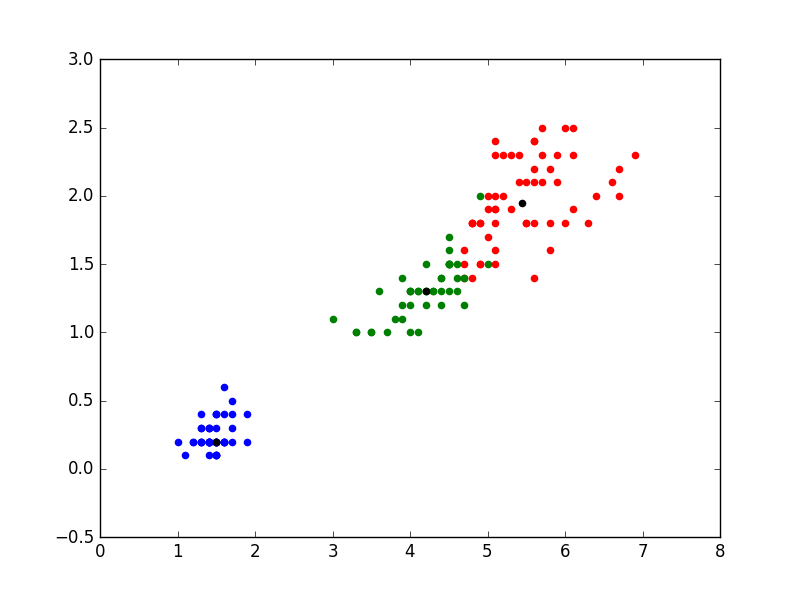

In [56]:
from IPython.display import Image
Image(filename = 'C://Users//Ratan Singh//Desktop//Kmeans.png',width = 800, height = 800)